# 08: Recursive Forecasting Baseline

We’ll train a LightGBM‐based `ForecasterRecursive` on our model-ready data to produce **day-ahead** forecasts.

In [ ]:
import pandas as pd
from lightgbm import LGBMRegressor
from skforecast.recursive import ForecasterRecursive
from sklearn.metrics import mean_squared_error
import numpy as np

FEATURE_PATH = "data/daily_dataset/daily_df_modelready.parquet"
df = pd.read_parquet(FEATURE_PATH)
print("Loaded model-ready DF:", df.shape)
df.head()

In [ ]:
# target
y = df["daily_sale_imputed"]

# full feature set
X = df.drop(columns="daily_sale_imputed")

# time-series split: last 7 days for validation
horizon = 7
split_idx = len(df) - horizon

X_train, X_val = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_val = y.iloc[:split_idx], y.iloc[split_idx:]

In [7]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error

model = LGBMRegressor(
    n_estimators   = 200,
    learning_rate = 0.05,
    random_state  = 42
)
model.fit(X_train, y_train)

preds = model.predict(X_val)
mse  = mean_squared_error(y_val, preds)    
rmse = np.sqrt(mse)
print(f"LightGBM RMSE: {rmse:.3f}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017584 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1131
[LightGBM] [Info] Number of data points in the train set: 3799993, number of used features: 8
[LightGBM] [Info] Start training from score 1.471782
LightGBM RMSE: 1.244


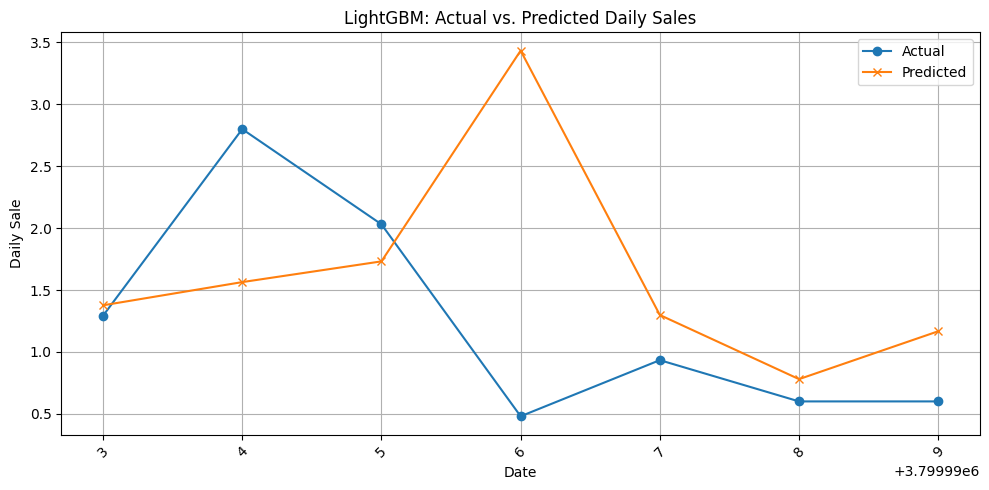

In [ ]:
# Cell X — Plot Actual vs. Predicted
import matplotlib.pyplot as plt

# y_val and preds should already be in your namespace
plt.figure(figsize=(10, 5))
plt.plot(y_val.index, y_val.values, label='Actual')
plt.plot(y_val.index, preds, label='Predicted')
plt.title('LightGBM: Actual vs. Predicted Daily Sales')
plt.xlabel('Date')
plt.ylabel('Daily Sale')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
df

,daily_sale_imputed,lag_1,lag_7,lag_14,roll_mean_7,day_of_week,is_weekend,time_idx,oos_hours_total
0,1.440000,0.600000,0.200000,0.100000,0.232857,3,0,14,19
1,1.028571,1.440000,0.000000,0.114286,0.410000,4,0,15,17
2,1.066667,1.028571,0.200000,0.000000,0.556939,5,1,16,6
3,0.300000,1.066667,0.000000,0.218182,0.680748,6,1,17,0
4,0.500000,0.300000,0.150000,0.533333,0.723605,0,0,18,0
...,...,...,...,...,...,...,...,...,...
3799995,2.030769,2.800000,0.960000,1.527273,1.114644,4,0,85,11
3799996,0.480000,2.030769,0.757895,2.400000,1.267611,5,1,86,19
3799997,0.933333,0.480000,0.200000,1.642857,1.227912,6,1,87,6
3799998,0.600000,0.933333,0.500000,1.200000,1.332674,0,0,88,0
